1. Data Ingesiton

2. Eda of the data

3. processing of the data

4. model building

5. model evalution

# Data Ingestion

Import the Required Libraries: Import the required libraries such as pandas, numpy, matplotlib, seaborn, etc.

Load the Data.

Load the Time Series Data into a pandas dataframe.

Check the datatype of the index and convert it to datetime if necessary.

Set the datetime column as the index of the dataframe.



In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import pandas as pd
data=pd.read_csv("TSLA.csv")

In [7]:
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


In [8]:
# univariate timeseries

# multivariate timeseries

In [9]:
stock_data=data[["Date","Close"]]

In [10]:
#univariate time series analysis
stock_data.head()

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002


In [11]:
stock_data.shape

(758, 2)

In [12]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [13]:
stock_data["Date"]=pd.to_datetime(stock_data["Date"])

In [14]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [15]:
stock_data=stock_data.set_index("Date")

In [16]:
stock_data

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


# why we are converting date column as a index column

1. i can easily retrive the data
2. visulization is also simple
3. those lib has been degine in such a way it required date column as a index(scipy statsmodel)

# EDA(exploratory data analysis)

1. Summary Statistics
- Compute summary statistics such as mean, median, mode, standard deviation, to get an overview of the data.

2. Visualize the Time Series Data
- Plot the Time Series data 

- Plot the rolling mean and rolling standard deviation of the Time Series data.
- Decompose the Time Series Data check for any trends, seasonality, and Noise.
- Plot the decomposed components to get a better understanding of the Time Series data.

3. Stationarity Check
- Check for stationarity.
- Check for stationarity of the Time Series data using the Augmented Dickey-Fuller test.

4. Check for Autocorrelation
- Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.

5. Outlier Detection
- Detect and handle outliers using statistical methods or machine learning techniques.

In [17]:
stock_data.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


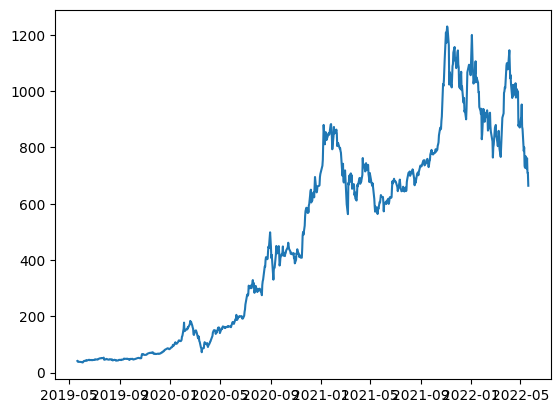

In [18]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(stock_data.Close)

(array([228.,  57.,  38.,  59.,  50., 127.,  81.,  44.,  59.,  15.]),
 array([  35.79399872,  155.20560226,  274.61720581,  394.02880936,
         513.4404129 ,  632.85201645,  752.26362   ,  871.67522354,
         991.08682709, 1110.49843063, 1229.91003418]),
 <BarContainer object of 10 artists>)

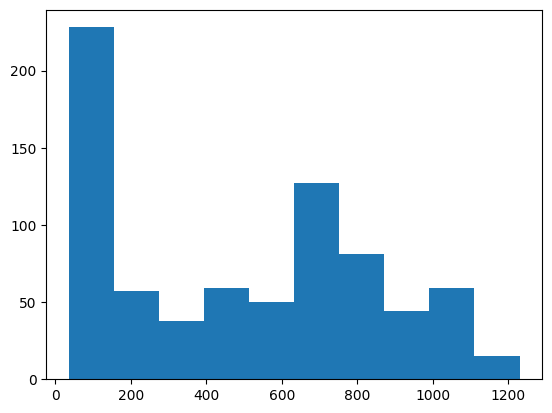

In [19]:
plt.hist(stock_data.Close)

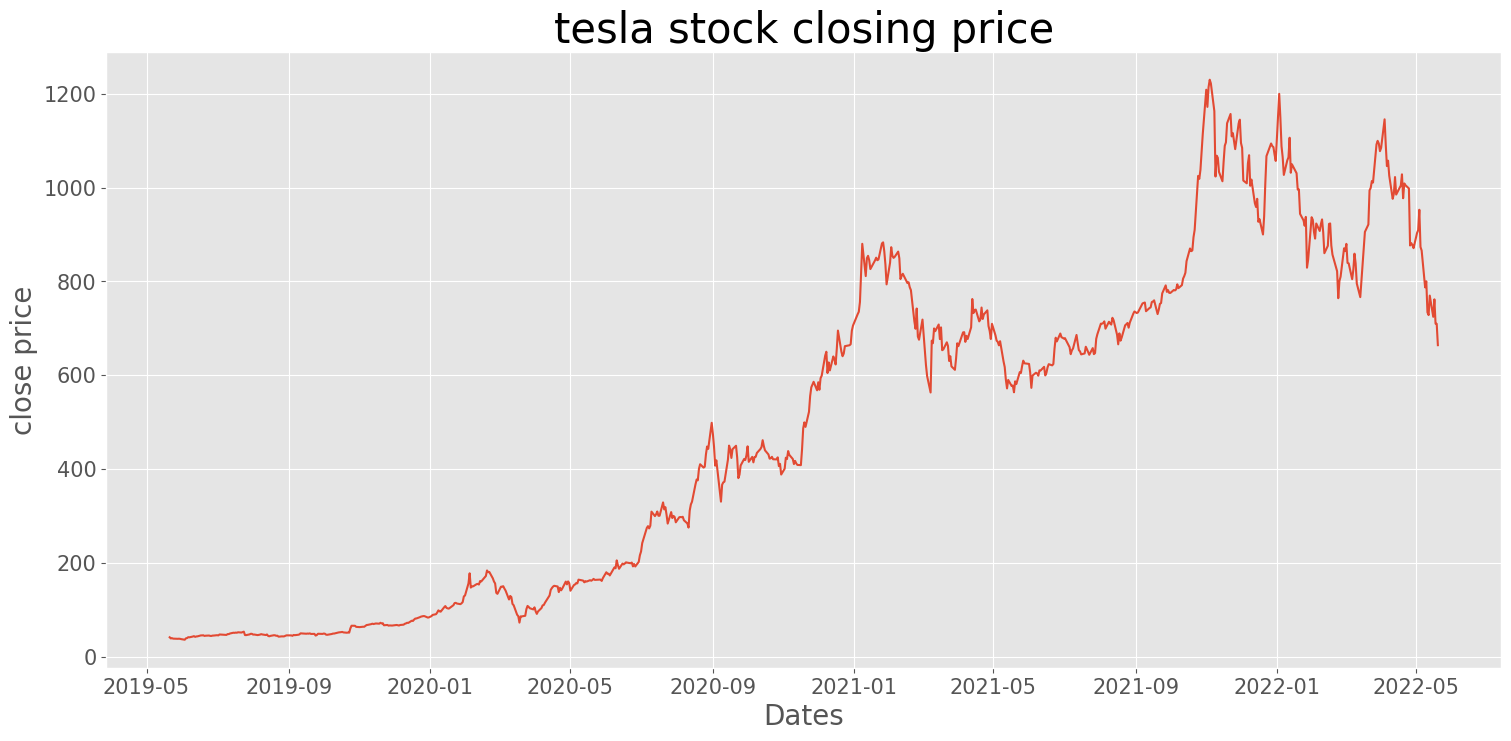

In [20]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel("Dates",fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel("close price",fontsize=20)
plt.yticks(fontsize = 15) 
plt.plot(stock_data["Close"])
plt.title("tesla stock closing price",fontsize=30)
plt.show()

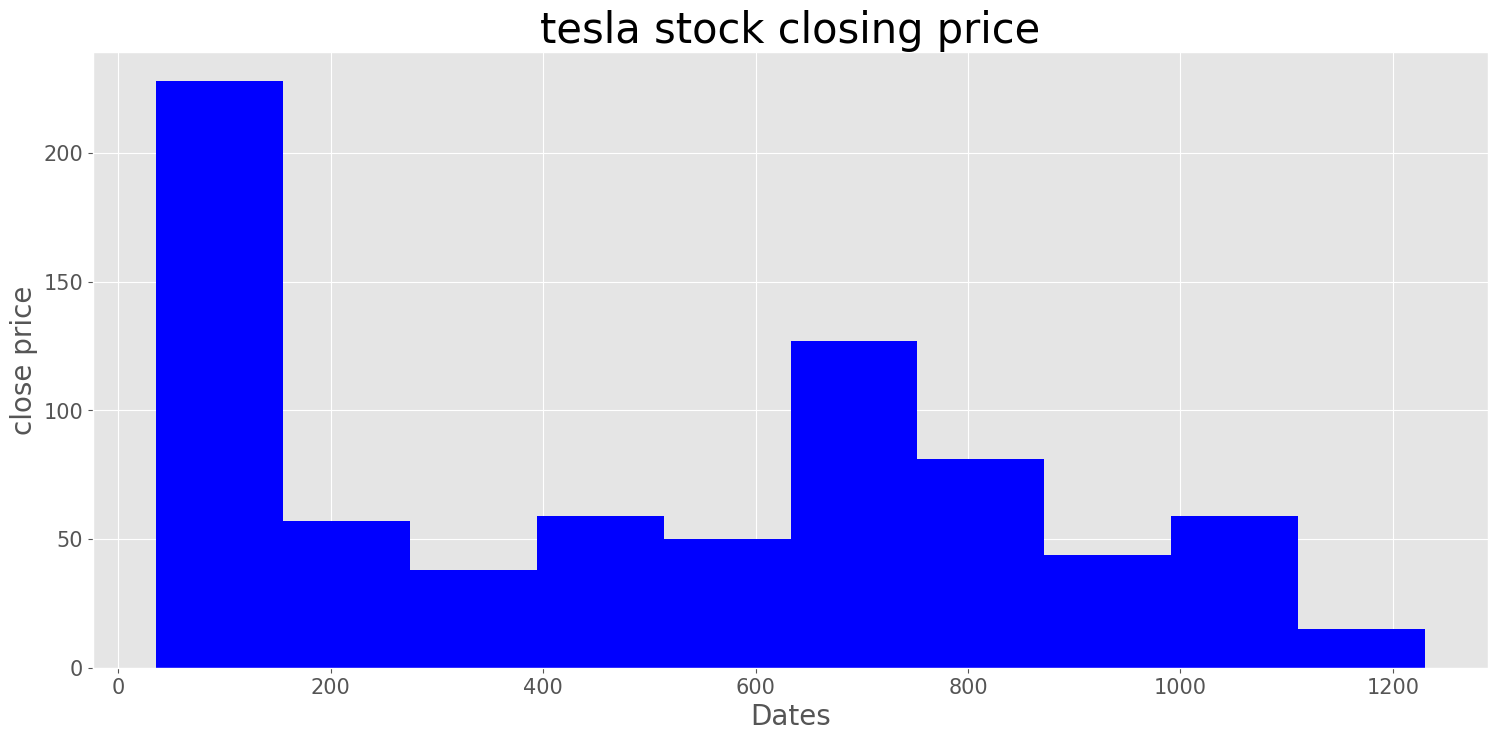

In [21]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel("Dates",fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel("close price",fontsize=20)
plt.yticks(fontsize = 15) 
plt.hist(stock_data['Close'], linewidth = 3, color = 'blue')
plt.title("tesla stock closing price",fontsize=30)
plt.show()

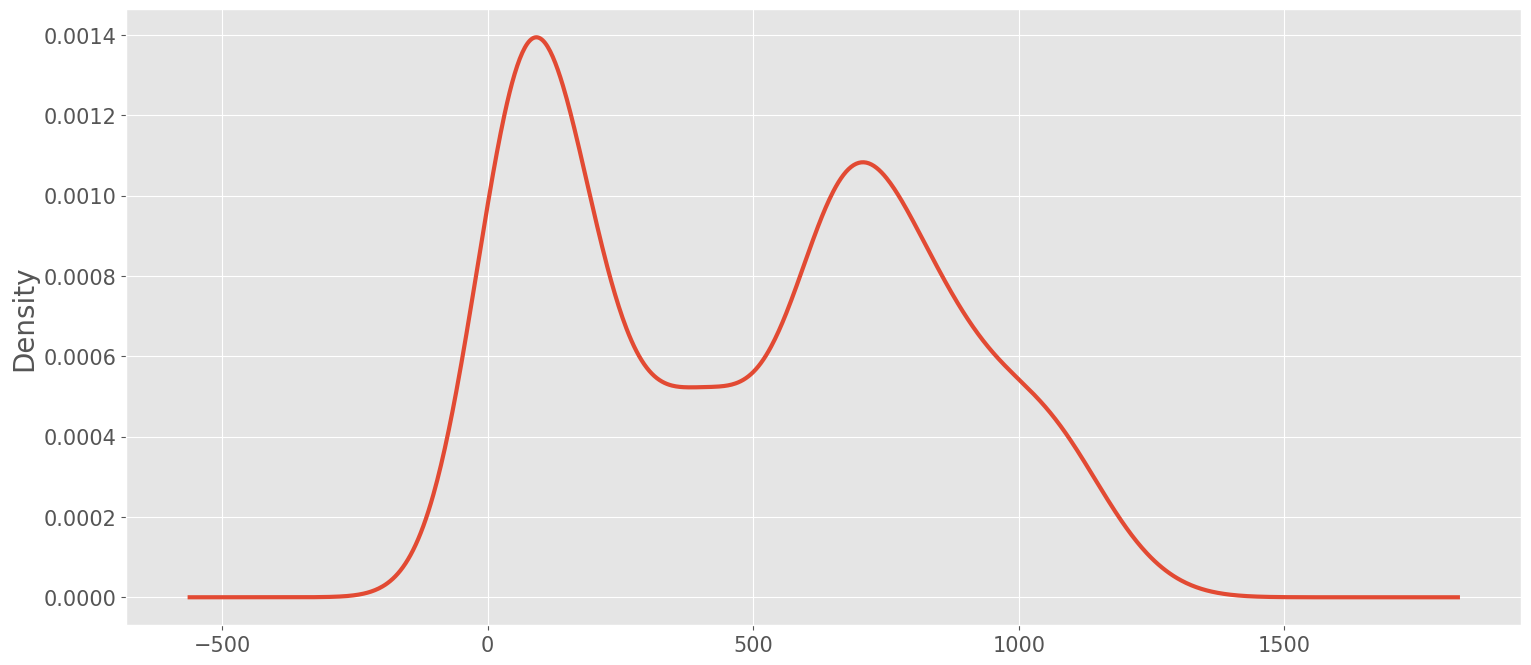

In [22]:
df_close = stock_data['Close'] 
df_close.plot(kind='kde',figsize = (18,8), linewidth= 3) 
plt.xticks(fontsize = 15)
plt.grid("both")
plt.ylabel('Density', fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

In [23]:
rolmean=stock_data["Close"].rolling(365).mean()

In [24]:
stock_data["Close"].rolling(3).std()

Date
2019-05-21          NaN
2019-05-22          NaN
2019-05-23     1.296425
2019-05-24     0.487492
2019-05-28     0.699754
                ...    
2022-05-16    25.125547
2022-05-17    24.136242
2022-05-18    26.714694
2022-05-19    30.019958
2022-05-20    26.394268
Name: Close, Length: 758, dtype: float64

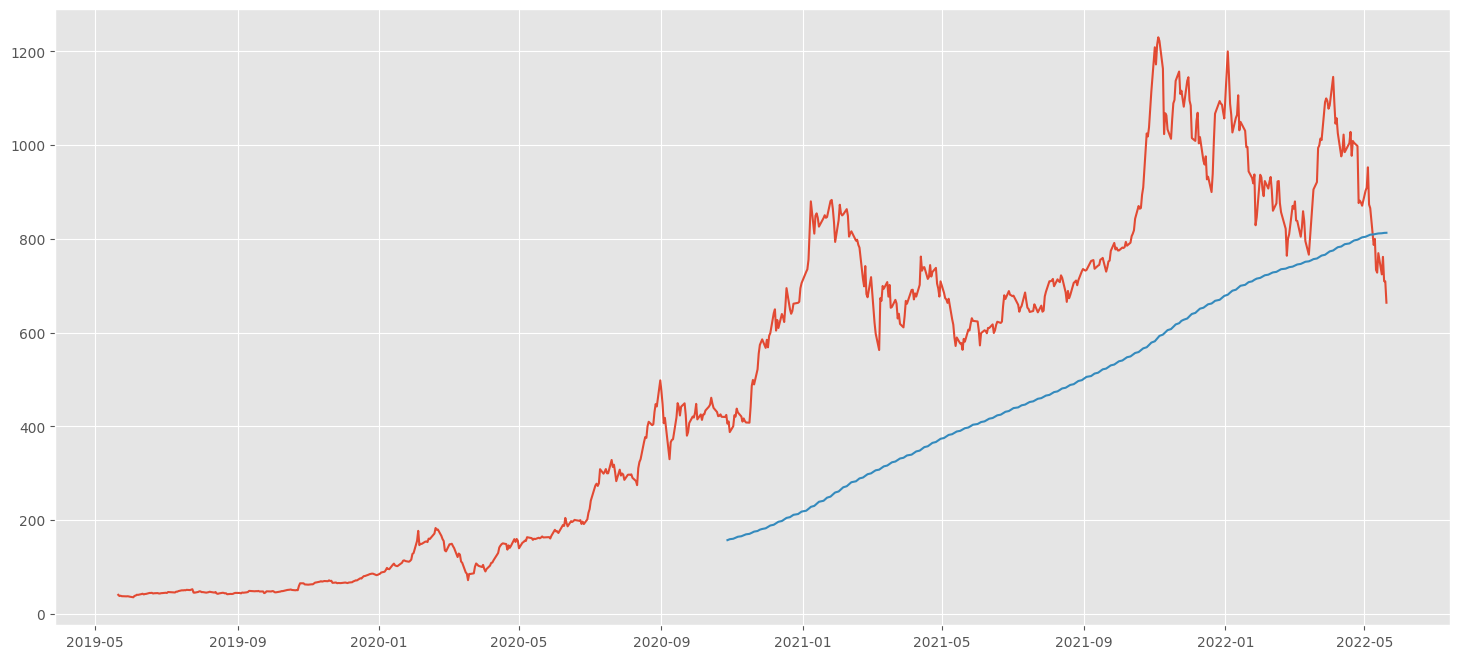

In [25]:
plt.figure(figsize=(18,8))
plt.plot(stock_data.Close)
plt.plot(rolmean)
plt.show()

In [26]:
from statsmodels.tsa.stattools import adfuller
adft=adfuller(stock_data["Close"])

In [27]:
adft

(-1.3630085817037507,
 0.5998762543050689,
 9,
 748,
 {'1%': -3.43912257105195,
  '5%': -2.8654117005229844,
  '10%': -2.568831705010152},
 6794.359259220987)

In [28]:
pd.Series(adft[0:4],index=["test stats","p-value","lag","data point"])

test stats     -1.363009
p-value         0.599876
lag             9.000000
data point    748.000000
dtype: float64

In [29]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(48).mean() # rolling mean
    rolstd = timeseries.rolling(48).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    

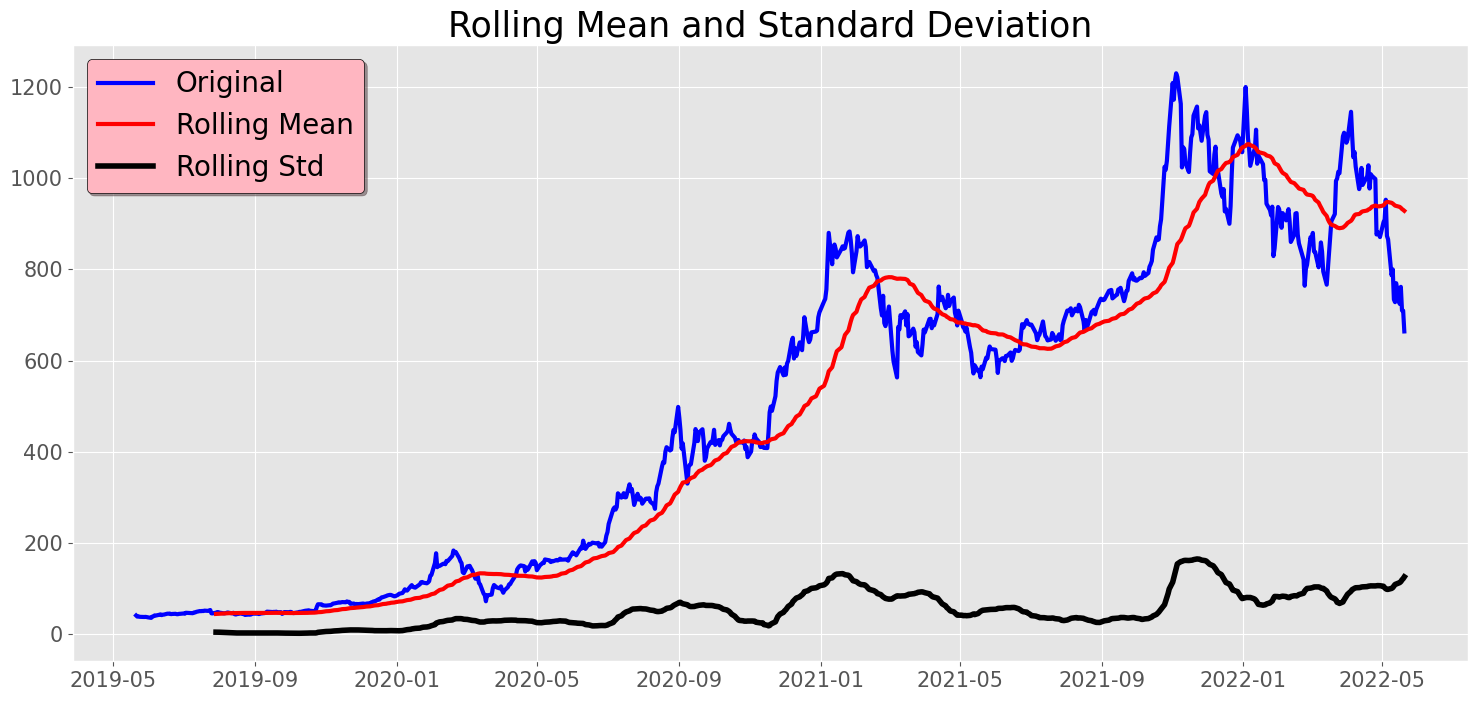

Results of dickey fuller test
Test Statistics                 -1.363009
p-value                          0.599876
No. of lags used                 9.000000
Number of observations used    748.000000
critical value (1%)             -3.439123
critical value (5%)             -2.865412
critical value (10%)            -2.568832
dtype: float64


In [30]:
test_stationarity(stock_data.Close)

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(stock_data["Close"],model= "multiplicative",period=30)

<Figure size 2000x1000 with 0 Axes>

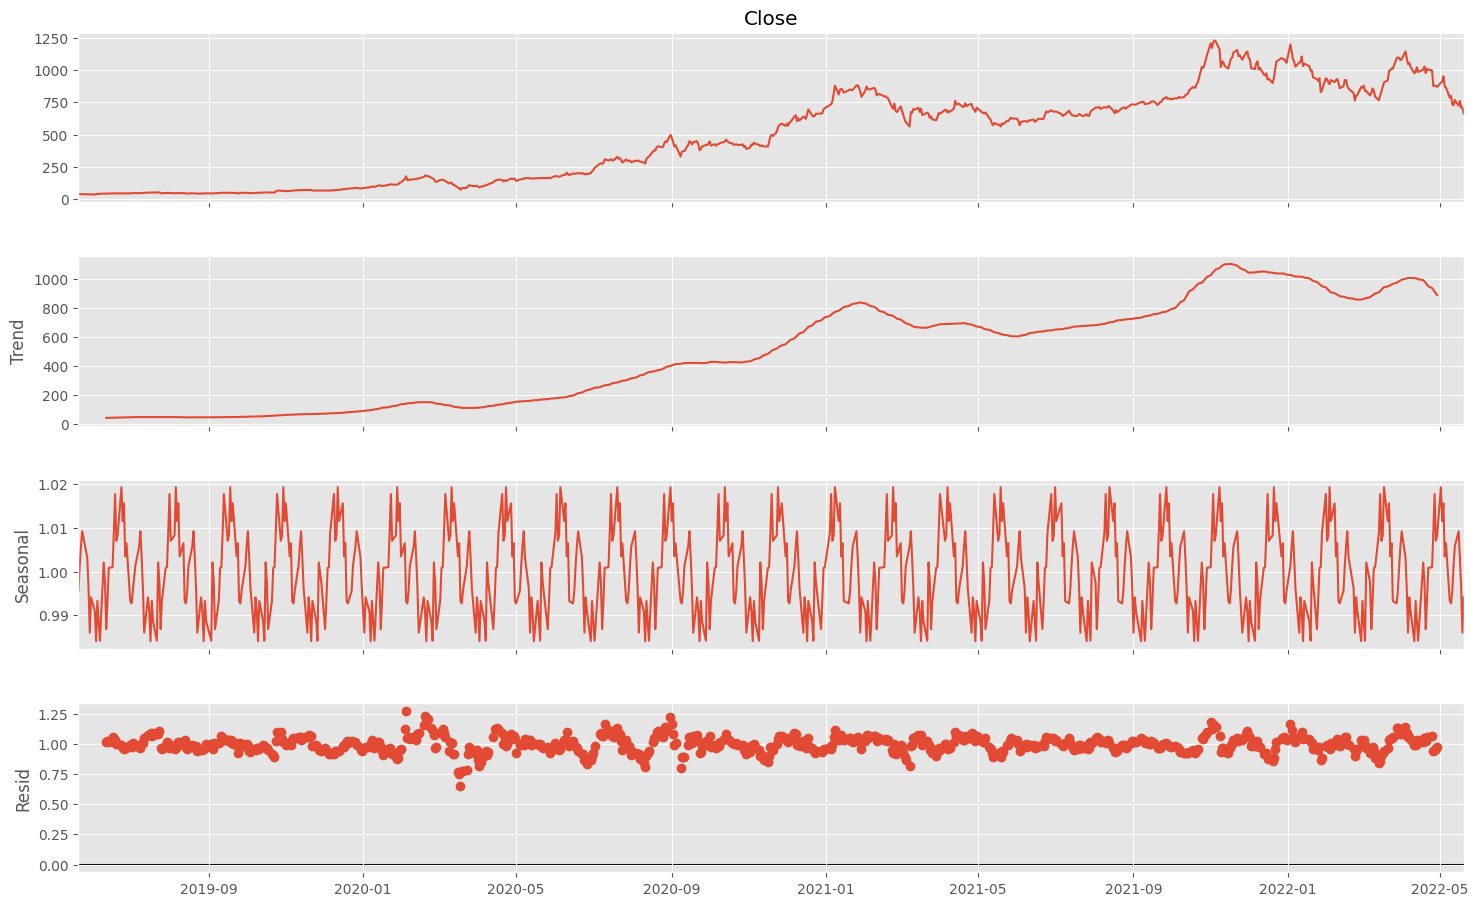

In [32]:
plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

In [33]:
result.seasonal

Date
2019-05-21    0.995645
2019-05-22    1.001321
2019-05-23    1.005804
2019-05-24    1.009275
2019-05-28    1.003281
                ...   
2022-05-16    1.009275
2022-05-17    1.003281
2022-05-18    0.996281
2022-05-19    0.986065
2022-05-20    0.994151
Name: seasonal, Length: 758, dtype: float64

In [34]:
result.resid

Date
2019-05-21   NaN
2019-05-22   NaN
2019-05-23   NaN
2019-05-24   NaN
2019-05-28   NaN
              ..
2022-05-16   NaN
2022-05-17   NaN
2022-05-18   NaN
2022-05-19   NaN
2022-05-20   NaN
Name: resid, Length: 758, dtype: float64

In [35]:
result.trend

Date
2019-05-21   NaN
2019-05-22   NaN
2019-05-23   NaN
2019-05-24   NaN
2019-05-28   NaN
              ..
2022-05-16   NaN
2022-05-17   NaN
2022-05-18   NaN
2022-05-19   NaN
2022-05-20   NaN
Name: trend, Length: 758, dtype: float64

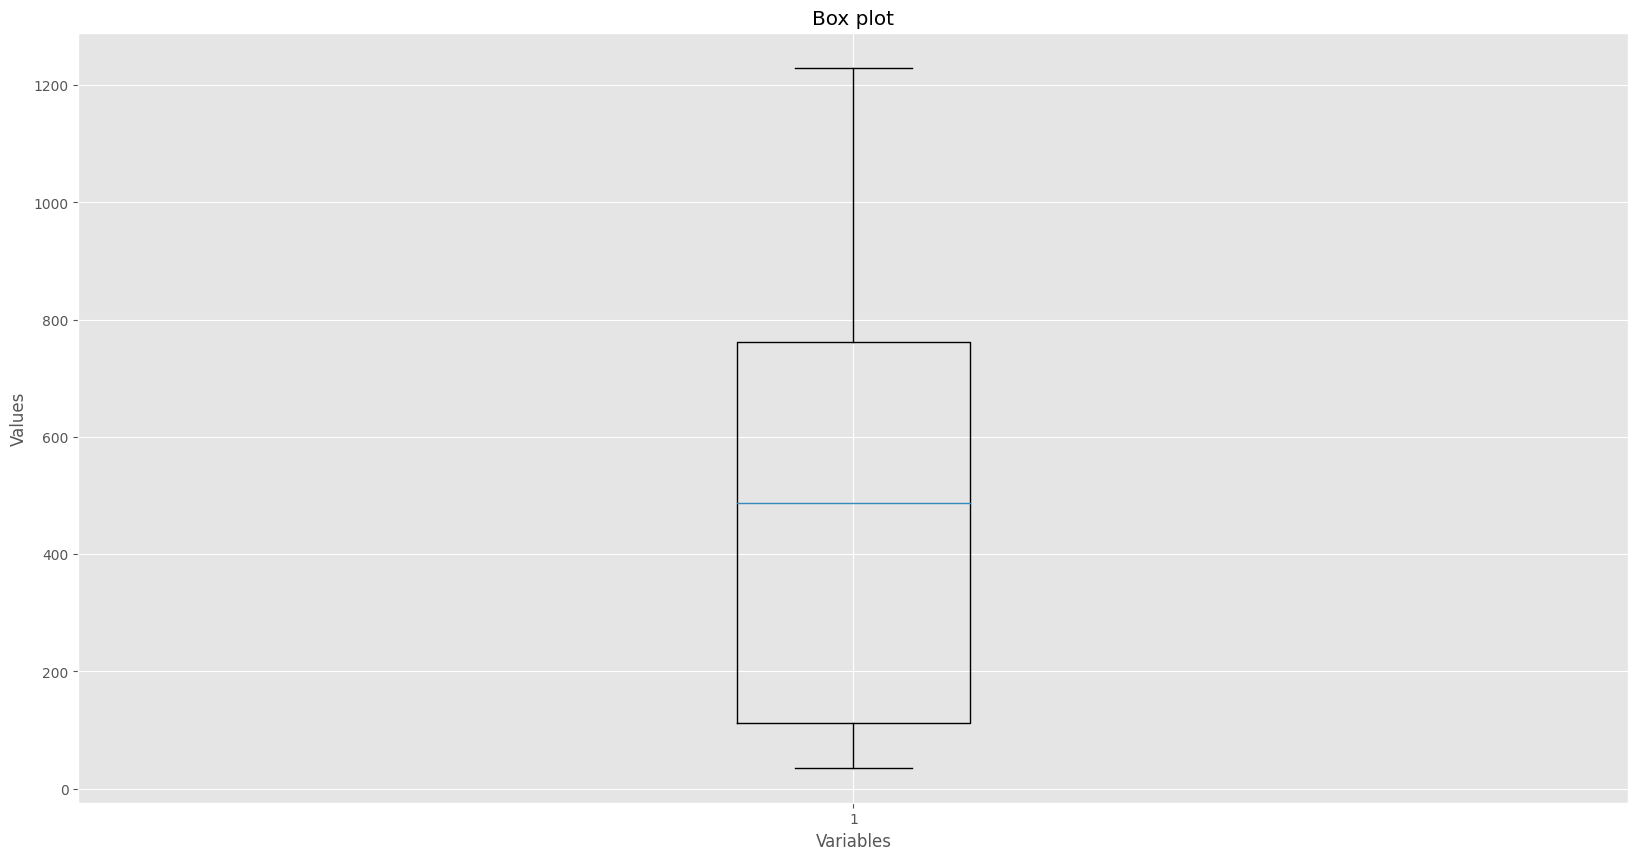

In [36]:
fig, ax = plt.subplots(figsize=(20, 10))
# Plot the box plot
ax.boxplot(stock_data["Close"])
# Set the x-axis label
ax.set_xlabel('Variables')
# Set the y-axis label
ax.set_ylabel('Values')
# Set the title
ax.set_title('Box plot')
# Show the plot
plt.show()

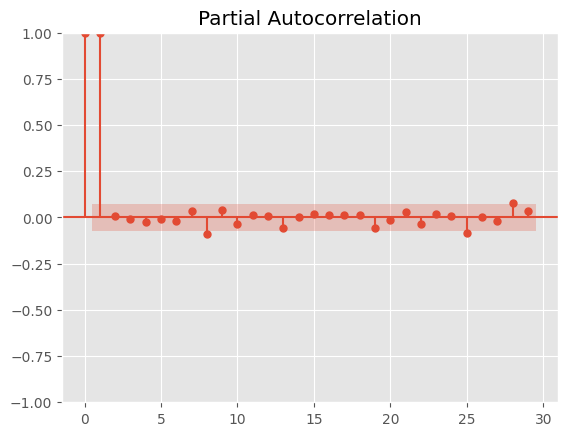

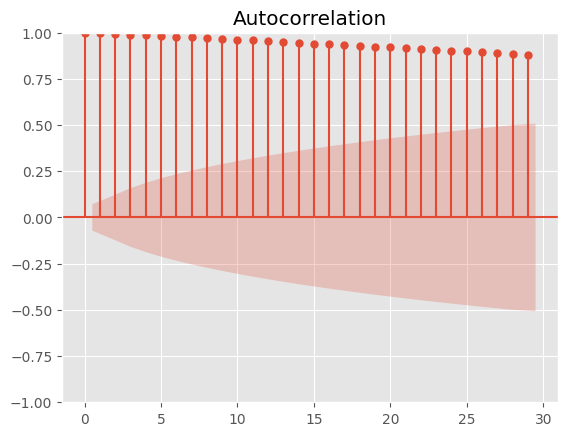

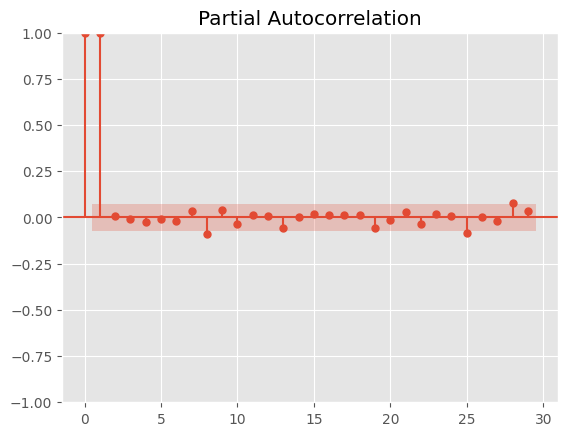

In [37]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(stock_data.Close)
plot_pacf(stock_data.Close)

# Preprocessing of the data

1. fill the miss(here not required)

2. convert data into the stationary time series

3. if necessary then normalize the data(here not required)

4. split the data into train and test

5. clean the data by removing the outlier(here not required)

In [38]:
df_close=stock_data["Close"]

In [39]:
tsla_close_diff_1=df_close.diff()

In [40]:
tsla_close_diff_1=tsla_close_diff_1.dropna()

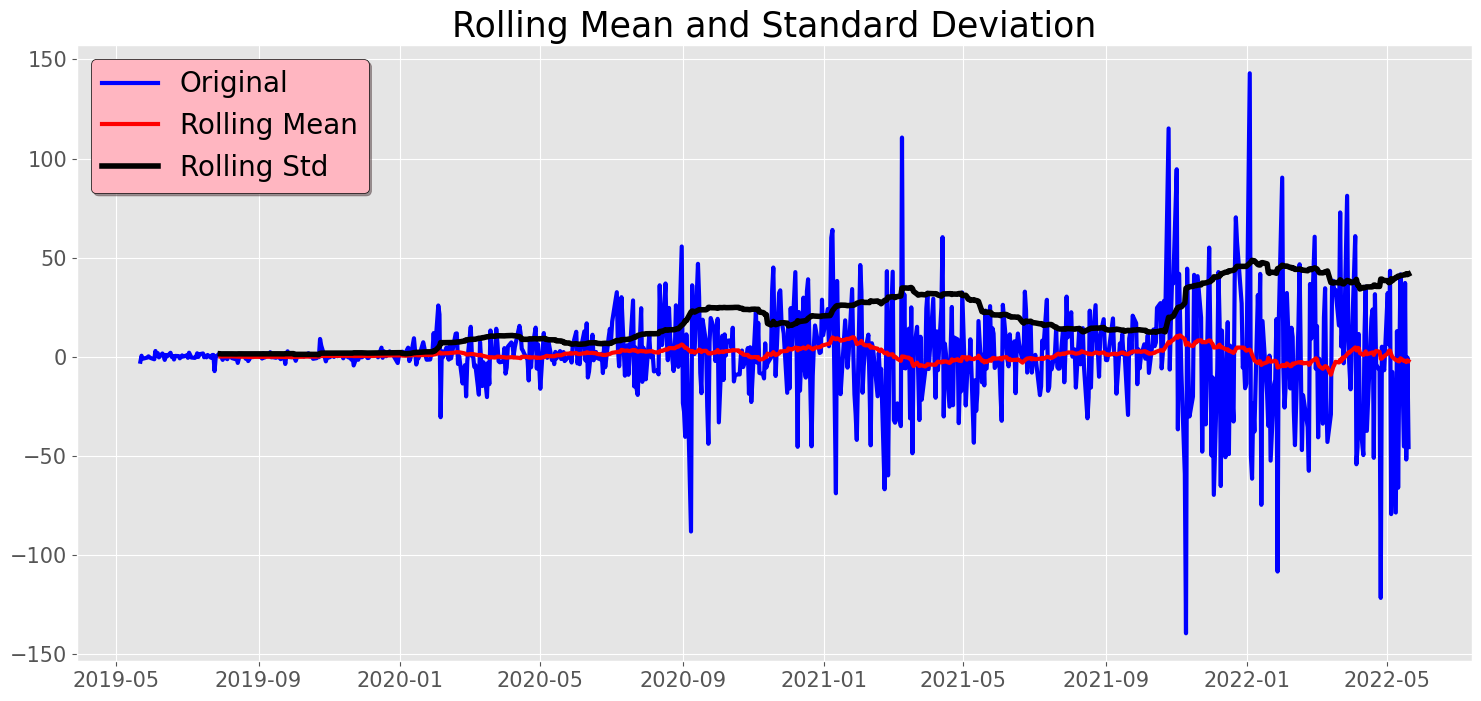

Results of dickey fuller test
Test Statistics               -8.324564e+00
p-value                        3.498786e-13
No. of lags used               8.000000e+00
Number of observations used    7.480000e+02
critical value (1%)           -3.439123e+00
critical value (5%)           -2.865412e+00
critical value (10%)          -2.568832e+00
dtype: float64


In [41]:
test_stationarity(tsla_close_diff_1)

In [42]:
df_close.diff(2)

Date
2019-05-21          NaN
2019-05-22          NaN
2019-05-23    -1.917999
2019-05-24    -0.420002
2019-05-28    -1.357998
                ...    
2022-05-16    -3.630005
2022-05-17    -7.980042
2022-05-18   -14.559998
2022-05-19   -52.190002
2022-05-20   -45.909973
Name: Close, Length: 758, dtype: float64

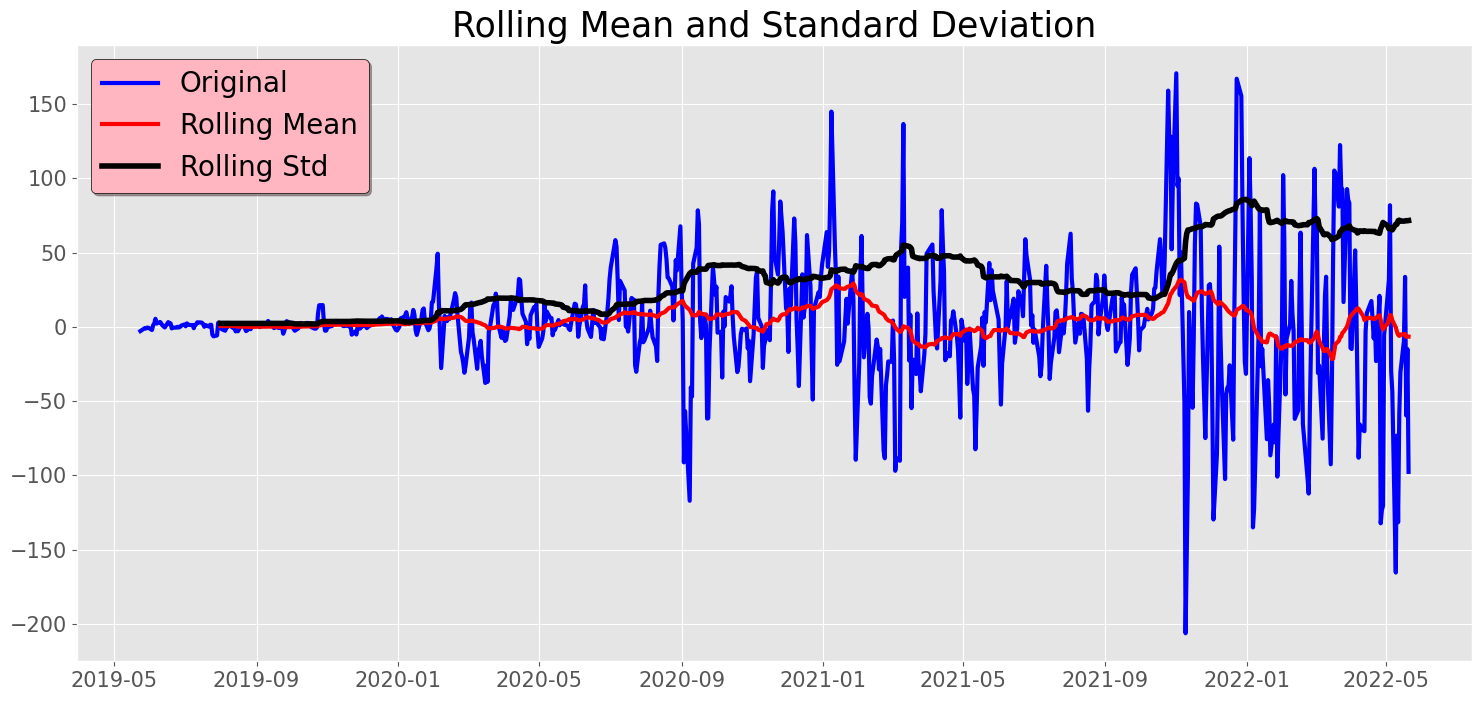

Results of dickey fuller test
Test Statistics               -5.697365e+00
p-value                        7.817959e-07
No. of lags used               1.900000e+01
Number of observations used    7.350000e+02
critical value (1%)           -3.439278e+00
critical value (5%)           -2.865480e+00
critical value (10%)          -2.568868e+00
dtype: float64


In [43]:
tsla_close_diff_3=df_close.diff(3)
tsla_close_diff_3=tsla_close_diff_3.dropna()
test_stationarity(tsla_close_diff_3)

In [44]:
train_data=df_close[0:-60]
test_data=df_close[-60:]

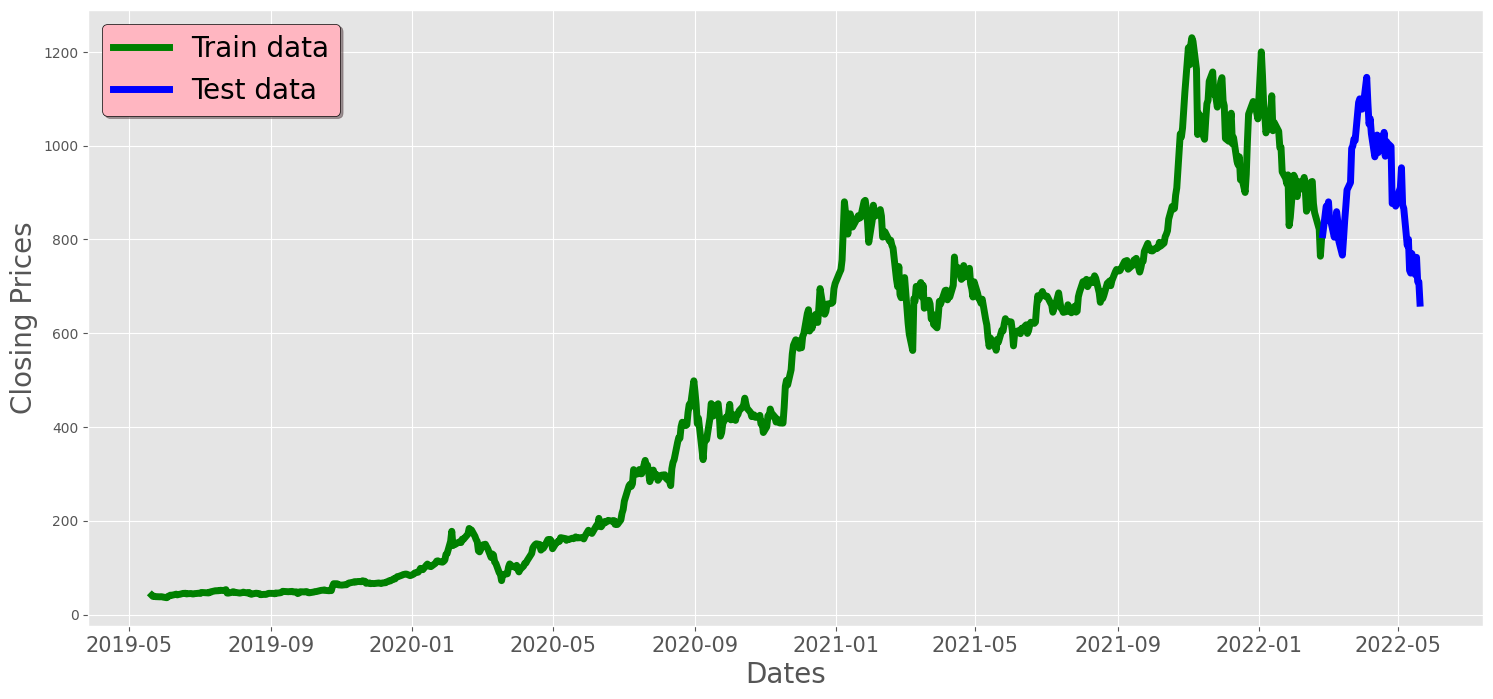

In [45]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.ylabel('Closing Prices', fontsize = 20)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.plot(train_data, 'green', label='Train data', linewidth = 5)
plt.plot(test_data, 'blue', label='Test data', linewidth = 5)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')

In [52]:
from statsmodels.tsa.arima.model import ARIMA

In [54]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [55]:
history=[x for x in train_data]

In [56]:
history

[41.01599884033203,
 38.54600143432617,
 39.09799957275391,
 38.1259994506836,
 37.7400016784668,
 37.97200012207031,
 37.64400100708008,
 37.03200149536133,
 35.79399871826172,
 38.720001220703125,
 39.31800079345703,
 41.18999862670898,
 40.900001525878906,
 42.57600021362305,
 43.41999816894531,
 41.85200119018555,
 42.78200149536133,
 42.98400115966797,
 45.00600051879883,
 44.948001861572266,
 45.2859992980957,
 43.92399978637695,
 44.37200164794922,
 44.72800064086914,
 43.95199966430664,
 43.854000091552734,
 44.56800079345703,
 44.69200134277344,
 45.43399810791016,
 44.90999984741211,
 46.97999954223633,
 46.619998931884766,
 46.06800079345703,
 46.012001037597656,
 47.78400039672852,
 47.720001220703125,
 49.01599884033203,
 50.70000076293945,
 50.47600173950195,
 50.97200012207031,
 50.70800018310547,
 51.63600158691406,
 51.13600158691406,
 52.03400039672852,
 52.97600173950195,
 45.76399993896485,
 45.608001708984375,
 47.15399932861328,
 48.45199966430664,
 48.32199859619

In [57]:
model=ARIMA(history,order=(1,1,1))

In [58]:
model=model.fit()

In [59]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  698
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3150.350
Date:                Wed, 05 Jul 2023   AIC                           6306.700
Time:                        19:29:13   BIC                           6320.340
Sample:                             0   HQIC                          6311.974
                                - 698                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2397      0.699      0.343      0.731      -1.129       1.609
ma.L1         -0.2713      0.690     -0.393      0.694      -1.623       1.080
sigma2       493.6767     11.690     42.231      0.000     470.765     516.588
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2111.30
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              31.69   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
model.forecast()

array([800.20438344])

In [61]:
test_data[0]

809.8699951171875

In [64]:
mean_squared_error([test_data[0]],[model.forecast()[0]])

93.42404918960744

In [65]:
def train_arima_model(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [66]:
# evaluate different combinations of p, d and q values for an ARIMA model to get the best order for ARIMA Model
def evaluate_models(dataset, test, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = train_arima_model(dataset, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))


In [67]:
# evaluate parameters
import warnings
warnings.filterwarnings('ignore')
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
evaluate_models(train_data, test_data, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=457.414
ARIMA(0, 0, 1) RMSE=241.163
ARIMA(0, 0, 2) RMSE=159.346
ARIMA(0, 1, 0) RMSE=39.516
ARIMA(0, 1, 1) RMSE=39.482
ARIMA(0, 1, 2) RMSE=39.617
ARIMA(0, 2, 0) RMSE=57.835
ARIMA(0, 2, 1) RMSE=39.611
ARIMA(0, 2, 2) RMSE=39.580
ARIMA(1, 0, 0) RMSE=39.477
ARIMA(1, 0, 1) RMSE=39.449
ARIMA(1, 0, 2) RMSE=39.584
ARIMA(1, 1, 0) RMSE=39.475
ARIMA(1, 1, 1) RMSE=39.555
ARIMA(1, 1, 2) RMSE=39.935
ARIMA(1, 2, 0) RMSE=46.184
ARIMA(1, 2, 1) RMSE=39.573
ARIMA(1, 2, 2) RMSE=39.731
ARIMA(2, 0, 0) RMSE=39.440
ARIMA(2, 0, 1) RMSE=39.494
ARIMA(2, 0, 2) RMSE=39.598
ARIMA(2, 1, 0) RMSE=39.635
ARIMA(2, 1, 1) RMSE=39.759
ARIMA(2, 1, 2) RMSE=39.630
ARIMA(2, 2, 0) RMSE=45.781
ARIMA(2, 2, 1) RMSE=39.740
ARIMA(2, 2, 2) RMSE=39.732
Best ARIMA(2, 0, 0) RMSE=39.440


In [68]:
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
for p in p_values:
        for d in d_values:
            for q in q_values:
                print(p,d,q)

0 0 0
0 0 1
0 0 2
0 1 0
0 1 1
0 1 2
0 2 0
0 2 1
0 2 2
1 0 0
1 0 1
1 0 2
1 1 0
1 1 1
1 1 2
1 2 0
1 2 1
1 2 2
2 0 0
2 0 1
2 0 2
2 1 0
2 1 1
2 1 2
2 2 0
2 2 1
2 2 2


In [70]:
history=[x for x in train_data]
predictions=list()
conf_list=list()
for t in range(len(test_data)):
    model=ARIMA(history,order=(1,1,0))
    model_fit = model.fit()
    fc, se, conf = model_fit.forecast(alpha = 0.05)
    predictions.append(fc)
    conf_list.append(conf)
    history.append(test_data[t])
print("RMSE of ARIMA Model:",np.sqrt(mean_squared_error(test_data,predictions)))

NameError: name 'conf' is not defined

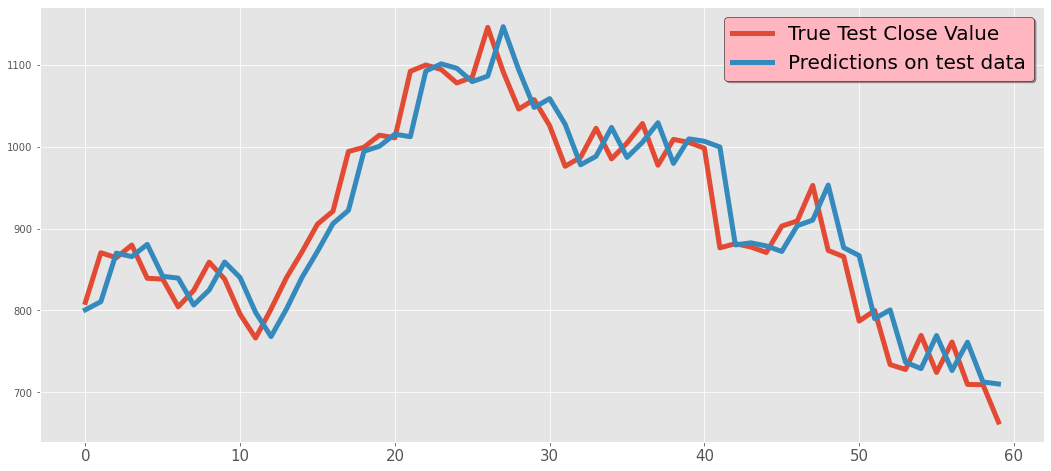

In [ ]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data, label = 'True Test Close Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

In [ ]:
import statsmodels.api as sm
history=[x for x in train_data]
predictions=list()
conf_list=list()
for t in range(len(test_data)):
    model=sm.tsa.statespace.SARIMAX(history,order=(0,1,0),seasonal_order=(1,1,1,3))
    model_fit=model.fit()
    fc=model_fit.forecast(alpha=0.05)
    predictions.append(fc)
    conf_list.append(conf)
    history.append(test_data[t])
print("RMSE of ARIMA Model:",np.sqrt(mean_squared_error(test_data,predictions)))

RMSE of ARIMA Model: 39.739481892720725


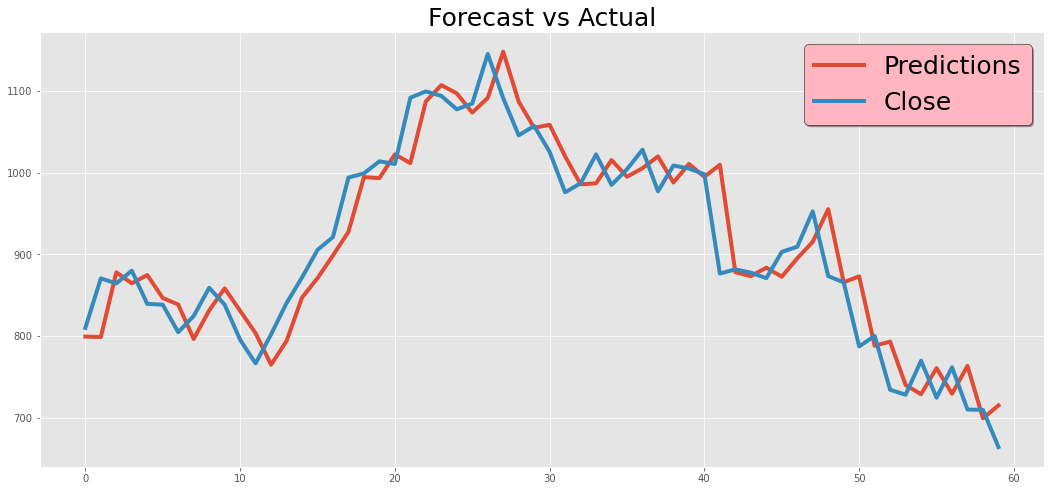

In [ ]:
plt.figure(figsize=(18,8))
plt.title('Forecast vs Actual', fontsize = 25)
plt.plot(range(60), predictions, label = 'Predictions', linewidth = 4)
plt.plot(range(60), test_data, label = 'Close', linewidth = 4)
plt.legend(fontsize = 25, shadow=True,facecolor='lightpink',edgecolor = 'k')

In [ ]:
df_close

Date
2019-05-21     41.015999
2019-05-22     38.546001
2019-05-23     39.098000
2019-05-24     38.125999
2019-05-28     37.740002
                 ...    
2022-05-16    724.369995
2022-05-17    761.609985
2022-05-18    709.809998
2022-05-19    709.419983
2022-05-20    663.900024
Name: Close, Length: 758, dtype: float64

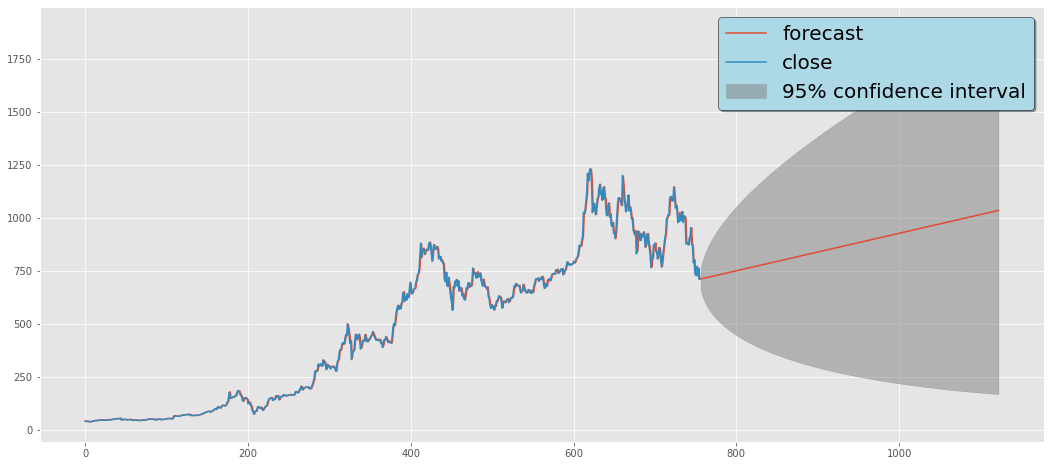

In [ ]:
fig=plt.figure(figsize=(18,8))
ax1=fig.add_subplot(111)
model_fit.plot_predict(start=1,end=len(df_close)+365,ax=ax1)
plt.grid("both")
plt.legend(["forecast","close","95% confidence interval"],fontsize=20,shadow=True,facecolor="lightblue",edgecolor="k")
plt.show()